In [1]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import xarray as xr
import numpy as np

In [2]:
weight_fraction_file = '/g/data/wp00/users/dbi599/agcd_v1_precip_weight_r005_obs-fraction_1960-1979.nc'

In [3]:
ds = xr.open_dataset(weight_fraction_file)

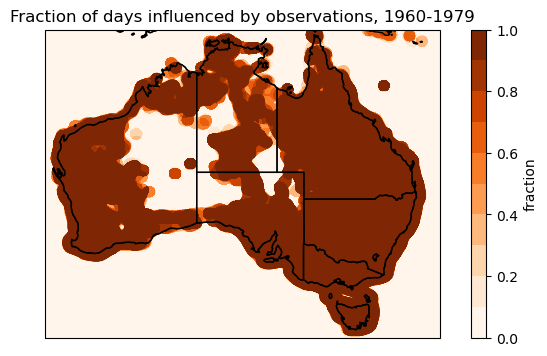

In [4]:
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ds['fraction'].plot.contourf(
    ax=ax,
    levels=np.arange(0, 1.01, 0.1),
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label': 'fraction'},
    cmap='Oranges')
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
plt.title('Fraction of days influenced by observations, 1960-1979')

plt.savefig(
    'obs_fraction_example.png',
    bbox_inches='tight',
    facecolor='white',
)